# Data 201

Data Wrangling, S2 2019

## Assignement 2

### 20% of final grade

## Due date: 2pm Tuesday 6 October 2020

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own pair** (or group of three if we are odd) **work**. Avoid plagiarism: if you are not sure what may constitute code plagiarism, read this http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism. Remember, when in doubt **declare your sources**.  
As a general rule, late submission are **highly** unsuggested. The pace of the course is very quick, and you don't want to be working on this too long, as you would have less time for other assignments. I suggest you to submit what you have ready by the time the assignment is due, even if it is not everything we required. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or TAs.


## Instruction

### Total: 20 marks.

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: better comments, means better marks.  
You can either modify this notebook or write a new one from scratch.

Do use the tidyverse syntax that's introduced in class and labs. If in doubt, refresh the lab material 1 to 7.

### Task (a): scrape it (5 marks)

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.

In [1]:
library(tidyverse)
library(magrittr)
library(purrr)
library(glue)
library(stringr)
library(rvest)
library(polite)

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




load these libraries

In [6]:
url <- "https://www.tvnz.co.nz/one-news/weather-forecast"
read_html(url)%>%
    html_nodes(".locationSelectDropdownSubItemsHolder")%>%
    html_nodes("ul")%>%
    html_nodes("li")%>%
    html_text()

[1] "Auckland"         "Dannevirke"       "Dargaville"       "Gisborne"        
 [5] "Hamilton"         "Hastings"         "Kaitaia"          "Levin"           
 [9] "Masterton"        "Napier"           "New Plymouth"     "Paihia"          
[13] "Palmerston North" "Paraparaumu"      "Rotorua"          "Taumarunui"      
[17] "Taupō"           "Tauranga"         "Te Kuiti"         "Thames"          
[21] "Tokoroa"          "Whanganui"        "Wellington"       "Whakatāne"      
[25] "Whangārei"       "Alexandra"        "Ashburton"        "Blenheim"        
[29] "Christchurch"     "Dunedin"          "Gore"             "Greymouth"       
[33] "Hokitika"         "Invercargill"     "Kaikōura"        "Motueka"         
[37] "Nelson"           "Oamaru"           "Queenstown"       "Reefton"         
[41] "Timaru"           "Wanaka"           "Westport"

read city name from "https://www.tvnz.co.nz/one-news/weather-forecast"

In [30]:
url_titles <- "https://www.tvnz.co.nz/one-news/weather-forecast" # this is the base url from where the scraping starts
read_html(url_titles)%>%
    html_nodes(".forecast")%>%
    html_nodes("p")%>%
    html_text() %>%
    str_trim()

[1] "North Island: A few showers in the west, south of Hamilton. Fine elsewhere. Severe gale westerlies possible about Wairarapa. South Island: Rain in the west and south, heavy for a time. Fine elsewhere. Severe gale northwesterlies for the Canterbury High Country and further south."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [2] "North Island: Fine, but cloudy periods in the west. Gale westerlies in Wairarapa, easing. South Island: Rain in the west and far south, clearing the south at night. Mainly fine elsewhere. Severe gale northwesterlies for the Canterbury High Country and further south."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

read brief introduction of weather from "https://www.tvnz.co.nz/one-news/weather-forecast"

In [8]:
read_html("https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html")%>%
           html_node(".forecast.observation.active")%>%
           html_node(".current")%>%
           html_text()

[1] "15°"

read auckland's current temperature form "https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html"

In [11]:
read_html("https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html")%>%
           html_node(".forecast.observation.active")%>%
           html_node(".sunrise")%>%
           html_node("span")%>%
           html_text()

[1] "Thu Oct 01 06:56:00 NZDT 2020"

read auckland's today's sunrise time from "https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html"

In [13]:
read_html("https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html")%>%
           html_node(".forecast.observation.active")%>%
           html_node(".windDirection")%>%
           html_text()

[1] "SSW"

read auckland's today's winddirection from https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html

In [35]:
read_html("https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html")%>%
           html_node(".forecast.observation.active")%>%
           html_node(".max")%>%
           html_text()

[1] "17°"

read auckland's today's highest temperature from https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html

In [15]:
read_html("https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html")%>%
           html_node(".forecast.observation.active")%>%
           html_node(".min")%>%
           html_text()

[1] "7°"

read auckland's today's lowest temperature from https://www.tvnz.co.nz/one-news/weather-forecast.auckland.html

### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

In [2]:
weather_difference <- function(city){   
    url_city <- glue("https://www.tvnz.co.nz/one-news/weather-forecast.{city}.html")
    list_of_regions <- 
    url_main <- "https://www.tvnz.co.nz/one-news/weather-forecast"
    read_html(url_main)%>%
        html_nodes(".locationSelectDropdownSubItemsHolder")%>%
        html_nodes("ul")%>%
        html_nodes("li")%>%
        html_text() 
    max_temp_today = read_html(url_city)%>%
                       html_node(".forecast.observation.active")%>%
                       html_node(".max")%>%
                       html_text()
    max_temp_today_b = str_sub(max_temp_today, 1, -2)
    max_temp_today_c = as.numeric(max_temp_today_b)
    min_temp_today = read_html(url_city)%>%
                       html_node(".forecast.observation.active")%>%
                       html_node(".min")%>%
                       html_text()
    min_temp_today_b = str_sub(min_temp_today, 1, -2)
    min_temp_today_c = as.numeric(min_temp_today_b)
    
    max_temp_tomorrow = read_html(url_city)%>%
                       html_node(xpath = paste("//div[@data-id = ",Sys.Date()+1,"]",sep = "'"))%>%
                       html_node(".max")%>%
                       html_text()
    max_temp_tomorrow_b = str_sub(max_temp_tomorrow, 1, -2)
    max_temp_tomorrow_c = as.numeric(max_temp_tomorrow_b)
    min_temp_tomorrow = read_html(url_city)%>%
                       html_node(xpath = paste("//div[@data-id = ",Sys.Date()+1,"]",sep = "'"))%>%
                       html_node(".min")%>%
                       html_text()
    min_temp_tomorrow_b = str_sub(min_temp_tomorrow, 1, -2)
    min_temp_tomorrow_c = as.numeric(min_temp_tomorrow_b)
    
    
    the_day_after_tomorrow_max_temp = read_html(url_city)%>%
                       html_node(xpath = paste("//div[@data-id = ",Sys.Date()+2,"]",sep = "'"))%>%
                       html_node(".max")%>%
                       html_text()
    the_day_after_tomorrow_max_temp_b = str_sub(the_day_after_tomorrow_max_temp, 1, -2)
    the_day_after_tomorrow_max_temp_c = as.numeric(the_day_after_tomorrow_max_temp_b)
    the_day_after_tomorrow_min_temp = read_html(url_city)%>%
                       html_node(xpath = paste("//div[@data-id = ",Sys.Date()+2,"]",sep = "'"))%>%
                       html_node(".min")%>%
                       html_text()
    the_day_after_tomorrow_min_temp_b = str_sub(the_day_after_tomorrow_min_temp, 1, -2)
    the_day_after_tomorrow_min_temp_c = as.numeric(the_day_after_tomorrow_min_temp_b)
    
       
    weather_diff <- tibble(name = city,                   
                       max_temp_today = max_temp_today,
                       
                       min_temp_today = min_temp_today,
                           
                    today_temp_diff = max_temp_today_c - min_temp_today_c,
                    
                       max_temp_tomorrow = max_temp_tomorrow,
                    
                       min_temp_tomorrow = min_temp_tomorrow,
                        
                    tomorrow_temp_diff = max_temp_tomorrow_c - min_temp_tomorrow_c,
                    
                       the_day_after_tomorrow_max_temp = the_day_after_tomorrow_max_temp,
                    
                       the_day_after_tomorrow_min_temp = the_day_after_tomorrow_min_temp,
                       
                    the_day_after_tomorrow_temp_diff = the_day_after_tomorrow_max_temp_c - the_day_after_tomorrow_min_temp_c,
                        
                       
                     ) 
  
  return(weather_diff)
}

In [5]:
weather_difference("christchurch")

name,max_temp_today,min_temp_today,today_temp_diff,max_temp_tomorrow,min_temp_tomorrow,tomorrow_temp_diff,the_day_after_tomorrow_max_temp,the_day_after_tomorrow_min_temp,the_day_after_tomorrow_temp_diff
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
christchurch,16°,1°,15,19°,8°,11,22°,13°,9


get today, tomorrow, and the day after tomorrow's max temperature, min temperature and temperature difference.
using stringr to deal with temperature strings.

### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

In [ ]:
city_link <- read("https://www.tvnz.co.nz/one-news/weather-forecast") %>%
html_node(".locationSelectDropdownSubItems") %>%
html_node("li")
html_attr("href")


get the link of cities' html page from https://www.tvnz.co.nz/one-news/weather-forecast

In [ ]:
get_temperature_safe <- purrr::possibly(.f = weather_difference,
                                   otherwise = NA_character_)

to make get weather difference function more safe

In [ ]:
df %<>%
  mutate(Cities = map_chr(city_link, get_temperature_safe))

df

### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

In [6]:
library(ggplot2)

In [5]:
dataframe <- weather_difference("christchurch")
dataframe

name,max_temp_today,min_temp_today,today_temp_diff,max_temp_tomorrow,min_temp_tomorrow,tomorrow_temp_diff,the_day_after_tomorrow_max_temp,the_day_after_tomorrow_min_temp,the_day_after_tomorrow_temp_diff
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
christchurch,15°,1°,14,19°,8°,11,22°,12°,10


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



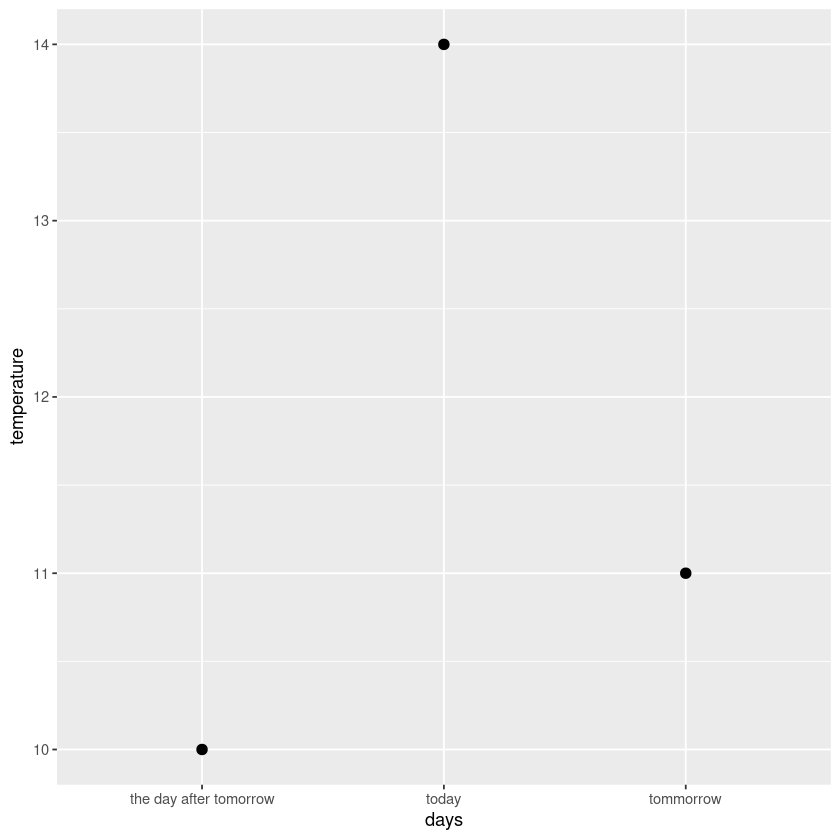

In [23]:
days = c("today", "tommorrow", "the day after tomorrow")
temperature = c(dataframe[[4]], dataframe[[7]], dataframe[[10]])
tgg = data.frame(days, temperature)
ggplot(tgg, aes(
x = days,
y = temperature)) +
geom_line()+ geom_point(size=4, shape=20)


plot the weather difference for christchurch for coming three days.

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

In [ ]:
library("httr")
headers <- c(
  "Content-Type" = "application/x-www-form-urlencoded; charset=UTF-8",
  "Accept" = "application/json, text/ java script, */*; q=0.01",
  "Accept-Language" = "zh-CN",
  "Accept-Encoding" = "gzip, deflate",
  "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36",
  "X-Requested-With" = "XMLHttpRequest"
)
GetCurrentCarList_url <- "http://59.175.135.157:8088/TopGps/Public/GetCurrentCarList"

cookies <- "Z9M6_79fc_saltkey=Q39U9G9S; Z9M6_79fc_lastvisit=1601532017; Z9M6_79fc_visitedfid=69; m_t_pinggu0518_m_t=1601535685389_1; _ga=GA1.2.2108113596.1601535685; _gid=GA1.2.493325767.1601535685; Z9M6_79fc_sid=YEbBwf; Z9M6_79fc_oldtopics=6264385D4203436D6264385; Z9M6_79fc_viewlogs=6264385S1601541321V4203436S1601540131V4667681S1601535617; Z9M6_79fc_sendmail=1; Z9M6_79fc_lastact=1601541322%09appapi.php%09dianzan; _gat=1"

payload <- list('orgId' = 0,
                'hasChild' = 1
               )

GetCurrentCarList <- POST(GetCurrentCarList_url, add_headers(.headers = headers), set_cookies(.cookies = cookies), body = payload, encode ="form")


using httr POST to go through an API, construct a header and cookies.

### Comment, explain and present the work in a clear way (1 marks)